In [152]:
# !pip install pandas openpyxl pyenchant nltk
# !pip install pyenchant 

In [153]:
import pandas as pd
import re
from difflib import get_close_matches
import enchant
from nltk.corpus import words
import nltk
from wordcloud import WordCloud


In [154]:
#  step 0 : Preload common correction dictionary for fuzzy matching

import pandas as pd

# Load the CSV file with misspelled words
misspellings_df = pd.read_csv('filtered_misspellings.csv')

# Create COMMON_MISSPELLINGS dictionary with misspelled words as keys
# Values are left empty for you to fill manually or programmatically later
COMMON_MISSPELLINGS = {row['Misspelling']: '' for _, row in misspellings_df.iterrows()}

# Example: print first few items
for k, v in list(COMMON_MISSPELLINGS.items())[:6]:
    print(f"'{k}': '{v}'")






'wanna': ''
'info': ''
'goddamn': ''
'uhelp': ''
'fucking': ''
'cancelations': ''


In [155]:
COMMON_MISSPELLINGS = {
    'wanna': 'want to',
    'info': 'information',
    'goddamn': '',  
    'damn'    : '',    # profane words, replace with empty space
    'uhelp': 'you help',
    'fucking': '',          # profane words, replace with empty space
    'bloody': '',           # profane words, replace with empty space
    'cancelations': 'cancellations',
    'canceling' : 'cancelling',
    'pwd': 'password',
    'signing': 'signing',
    'mom': 'mother',
    'uare': 'you are',
    'acount': 'account',
    'isn': 'isn\'t',
    'tl' : 'to',
    'avaqilable': 'available',
    'ehlp': 'help',
    'needhelp': 'need help',
    'cannott': 'cannot',
    'tto': 'to',
    'hwat': 'what',
    'wang': 'what',
    "do't" : 'dont',
    'cutomer': 'customer',
    'asistance': 'assistance',
    'huma' : 'human',
    'wiht': 'with',
    'acn': 'can',
    'ya': 'you',
    'newsleter': 'newsletter',
    'organizxation': 'organization',
    'changew': 'change',
    'uswer': 'user',
    'icreate': 'i create',
    'checkimg': 'checking',
    'utell': 'you tell',
    'paymnent': 'payment',
    'lcaim': 'claim',
    'canyou': 'can you',
    'ccan': 'can',
    'penaltie': 'penalty',
    'chnage': 'change',
    'creaitng': 'creating',
    'differentuser': 'different user',
    'newslewtter': 'newsletter',
    'infornation': 'information',
    'diffreent': 'different',
    'chattinb': 'chatting',
    'whattime': 'what time',
    'checkingf': 'checking',
    'filign': 'filing',
    'clpaim': 'claim',
    'avcount': 'account',
    'areavailable': 'are available',
    'acocunt': 'account',
    'informatoin': 'information',
    'helpretrieving': 'help retrieving',
    'hepp': 'help',
    'hewlp': 'help',
    'termniation': 'termination',
    'abuot': 'about',
    'ohurs': 'hours',
    'accont': 'account',
    'mke': 'make',
    'onlikne': 'online',
    'hyman': 'human',
    'aent': 'agent',
    'kkey': 'key',
    'rfeclamation': 'reclamation',
    'youur': 'your',
    'ur': 'your',
    'passowrd': 'password',
    'accpunt': 'account',
    'assistanec': 'assistance',
    'corpolrate': 'corporate',
    'corrdct': 'correct',
    'earpy': 'early',
    'neerd': 'need',
    'registre': 'register',
    'resoring': 'restoring',
    'unsubscribbe': 'unsubscribe',
    'coorporate': 'corporate',
    'addrses': 'address',
    'upodate': 'update',
    'reigstration': 'registration',
    'profiole': 'profile',
    'deo': 'do',              # checked context from data
    'ahve': 'have',
    'kinow': 'know',
    'knbow': 'know',
    'knlw': 'know',
    'perswonal': 'personal',
    'moidfy': 'modify',
    'theavailable': 'the available',
    'methos': 'methods',
    'acecss': 'access',
    'accesws': 'access',
    'howi': 'how',
    'cancellatino': 'cancellation',
    'ingo': 'info',
    'paymet': 'payment',
    'knwo': 'know',
    'accoynt': 'account',
    'usay': 'you say',
    'uirect': 'direct',
    'anmother': 'another',
    'paymen': 'payment',
    'myuser': 'my user',
    'edtails': 'details',
    'whyat': 'what',
    'donot': 'do not',
    'apyment': 'payment',
    'exiut': 'exit',
    'knowwhat': 'know what',
    'acxount': 'account',
    'czncellation': 'cancellation',
    'commpany': 'company',
    'sgnup': 'signup',
    'regiwtered': 'registered',
    'uupdatte': 'update',
    'subscripiton': 'subscription',
    'pahment': 'payment',
    'accounnt': 'account',
    'accdss': 'access',
    'retridve': 'retrieve',
    'havesubmitted': 'have submitted',
    'nede': 'need',
    'witth': 'with',
    'thedata': 'the data',
    'tomy': 'to my',
    'issxues': 'issues',
    'uer': 'user',
    'usr': 'user',
    'ouruser': 'our user',
    'closing': 'closing',
    'isuses': 'issues',
    'uspport': 'support',
    'needto': 'need to',
    'adcount': 'account',
    'tgry': 'try',
    'eazrly': 'early',
    'ocntact': 'contact',
    'ther': 'there',
    'wanbt': 'want',
    'assisatance': 'assistance',
    'assisrance': 'assistance',
    'feees': 'fees',
    'relcamation': 'reclamation',
    'newslettee': 'newsletter',
    'totalk': 'total',
    'proflie': 'profile',
    'helo': 'hello',
    'regardnig': 'regarding',
    'accouint': 'account',
    'reimburfsement': 'reimbursement',
    'updatng': 'updating',
    'reegistration': 'registration',
    'dfata': 'data',
    'filea': 'file',
    'addresxs': 'address',
    'hte': 'the',
    'wantg': 'want',
    'wantto': 'want to',
    'inforation': 'information',
    'mwmbers': 'members',
    'isgn': 'sign',
    'tryying': 'trying',
    'copmlaint': 'complaint',
    'ihave': 'i have',
    'informnig': 'informing',
    'termimation': 'termination',
    'clsoe': 'close',
    'possxible': 'possible',
    'consmuer': 'consumer',
    'moidfying': 'modifying',
    'allowe': 'allow',
    'hbelp': 'help',
    'metods': 'methods',
    'restoring': 'restoring',
    'nmewsletter': 'newsletter',
    'cancllation': 'cancellation',
    'thedelivery': 'the delivery',
    'issud': 'issued',
    'ohw': 'how',
    'acconut': 'account',
    'custome': 'customer',
    'tbe': 'the',
    'olst': 'list',
    'aren': 'are not',
    'uchange': 'you change',
    'someody': 'somebody',
    'wanmt': 'want',
    'uarenot': 'you are not',
    'uhave': 'you have',
    'cancellationcharge': 'cancellation charge',
    'speakto': 'speak to',
    'hlp': 'help',
    'informtaion': 'information',
    'restor': 'restore',
    'assistancer': 'assistance',
    'suscription': 'subscription',
    'uaccept': 'you accept',
    'personla': 'personal',
    'urallowed': 'you are allowed',
    'thd': 'the',
    'lodhe': 'lodge',
    'accounmt': 'account',
    'profle': 'profile',
    'chck': 'check',
    'reclamaqtion': 'reclamation',
    'cani': 'can i',
    'avialable': 'available',
    'cjeck': 'check',
    'acustomer': 'a customer',
    'otions': 'options',
    'contactig': 'contacting'
}


In [156]:
# Step 1: Normalize text
def normalize_text(text: str) -> str:
    text = text.lower().strip()
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    return text

In [157]:
# Step 2: Correct spelling based on known dictionary (or extendable)
def correct_spelling(text: str, correction_dict: dict) -> str:
    words = text.split()
    corrected = []
    for word in words:
        if word in correction_dict:
            corrected.append(correction_dict[word])
        else:
            # Optional: fuzzy correction if it's close to a known misspelling
            match = get_close_matches(word, correction_dict.keys(), n=1, cutoff=0.98)
            if match:
                corrected.append(correction_dict[match[0]])
            else:
                corrected.append(word)
    return ' '.join(corrected)



In [158]:
# Step 3: Apply full cleaning pipeline to a query
def clean_single_query(query: str, correction_dict: dict) -> str:
    query = normalize_text(query)
    query = correct_spelling(query, correction_dict)
    return query



In [159]:
# Step 4: Apply cleaning to entire Series + store raw→cleaned mapping
def clean_queries(queries: pd.Series, correction_dict: dict = COMMON_MISSPELLINGS) -> pd.DataFrame:
    raw_clean_map = []
    for q in queries:
        cleaned = clean_single_query(q, correction_dict)
        raw_clean_map.append((q, cleaned))

    df_cleaned = pd.DataFrame(raw_clean_map, columns=["raw_query", "cleaned_query"])
    df_cleaned.drop_duplicates(subset="cleaned_query", inplace=True)
    df_cleaned.reset_index(drop=True, inplace=True)
    
    print(f"Original queries: {len(queries)}")
    print(f"Unique cleaned queries: {df_cleaned['cleaned_query'].nunique()}")
    print(f"Duplicates removed after cleaning: {len(queries) - len(df_cleaned)}")

    return df_cleaned

In [160]:
# step 5 : Run the cleaning pipeline
# This function can be called to execute the entire cleaning process on a Series of queries.

def run_cleaning_pipeline(queries: pd.Series) -> pd.DataFrame:
    print("▶️ Step 1b: Cleaning Pipeline Started...\n")

    print("🔹 Normalizing, correcting spellings, and deduplicating queries...")
    df_cleaned = clean_queries(queries)

    print("\n✅ Cleaning complete.")
    print(f"📌 Final cleaned dataset size: {len(df_cleaned)} unique queries.")

    return df_cleaned


def load_data(path):
    df = pd.read_excel(path)
    queries = df['Queries'].dropna().str.strip().str.lower()
    return queries


# 1. Load data (if not already loaded)
queries = load_data("SkyRocket Data.xlsx")

# 2. Run full Step 1b cleaning pipeline
df_cleaned = run_cleaning_pipeline(queries)



▶️ Step 1b: Cleaning Pipeline Started...

🔹 Normalizing, correcting spellings, and deduplicating queries...
Original queries: 6539
Unique cleaned queries: 6500
Duplicates removed after cleaning: 39

✅ Cleaning complete.
📌 Final cleaned dataset size: 6500 unique queries.


In [161]:
df_cleaned.to_csv('cleaned_queries.csv', index=False)
print("finished cleaning and saved to cleaned_queries.csv")

finished cleaning and saved to cleaned_queries.csv


▶️ Step 1c: Re-profiling Cleaned Dataset...

 Cleaned Queries: 6500
 Duplicates Removed: 39
 Unique Cleaned Queries: 6500
 Avg. Words per Cleaned Query: 8.32


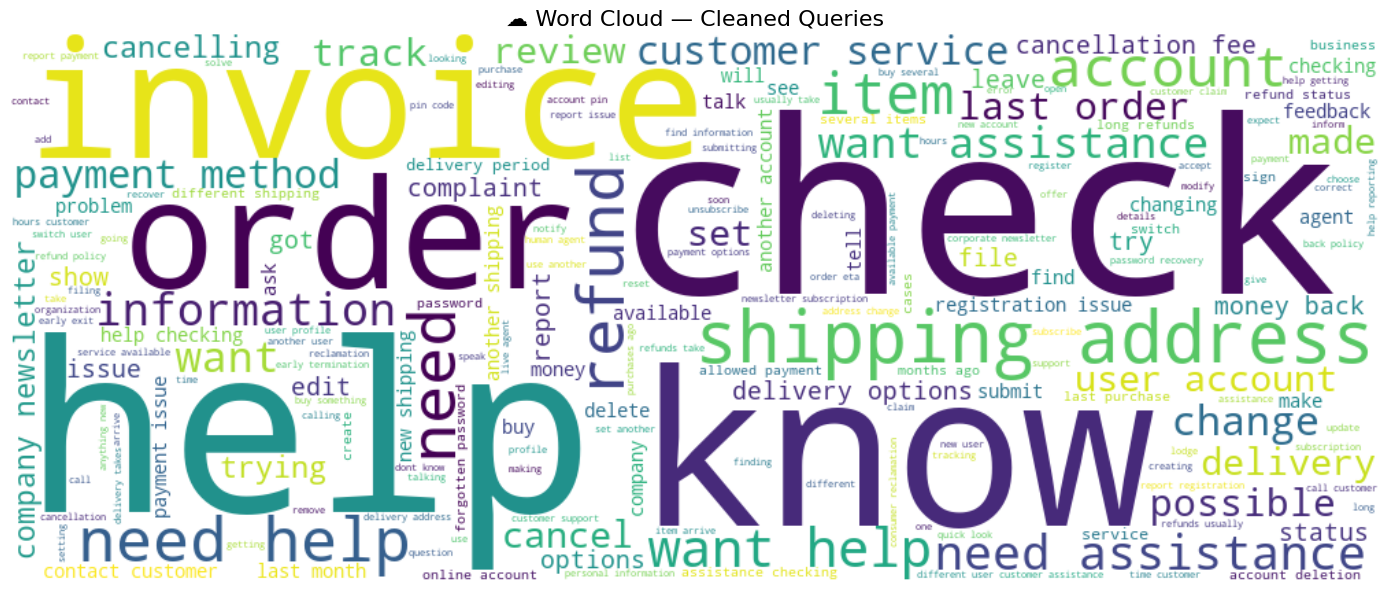

In [162]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def reprofile_cleaned_data(df_cleaned, original_query_count):
    print("▶️ Step 1c: Re-profiling Cleaned Dataset...\n")
    
    # Extract cleaned queries
    cleaned_queries = df_cleaned['cleaned_query']

    # Basic stats
    cleaned_total = len(cleaned_queries)
    cleaned_unique = cleaned_queries.nunique()
    cleaned_avg_len = cleaned_queries.apply(lambda x: len(x.split())).mean()
    duplicates_removed = original_query_count - cleaned_total

    print(f" Cleaned Queries: {cleaned_total}")
    print(f" Duplicates Removed: {duplicates_removed}")
    print(f" Unique Cleaned Queries: {cleaned_unique}")
    print(f" Avg. Words per Cleaned Query: {cleaned_avg_len:.2f}")

    # Word cloud
    all_words = " ".join(cleaned_queries.tolist())
    wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(all_words)

    plt.figure(figsize=(14, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("☁️ Word Cloud — Cleaned Queries", fontsize=16)
    plt.tight_layout()
    plt.show()



# original_query_count from the original data (i.e., 6539)
reprofile_cleaned_data(df_cleaned, original_query_count=6539)



I observed high duplication, informal tone, and heavy spelling variation in customer queries. Post cleaning, we retained ~6.5k high-signal unique queries with a core set of dominant intents. The cleaned dataset reveals user priorities like order status, refunds, account issues, and technical help  which will directly drive chatbot intent design in Step 2